<a href="https://colab.research.google.com/github/SewoongPark/SeSac_study_repo/blob/main/YOLO_study_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TIL**
### **IOU**
IOU (Intersection over Union)란?
> **Intersection over Union (IoU)**, 또는 Jaccard Index는 두 개의 바운딩 박스 또는 영역이 겹치는 정도를 측정하는 데 사용되는 메트릭입니다. 이 메트릭은 객체 검출, 세그멘테이션 등의 컴퓨터 비전 작업에서 주로 사용됩니다.

두 개의 바운딩 박스를 고려할 때 IoU는 다음과 같이 정의됩니다:

> $IoU$ = $\frac{Intersection}{Union}$

* Intersection은 두 개의 바운딩 박스가 겹치는 영역의 면적을 나타냅니다.
* Union은 두 개의 바운딩 박스를 모두 포함하는 영역의 면적을 나타냅니다.

> **Jaccard coefficient**

<img src = "https://miro.medium.com/v2/resize:fit:1400/1*TG5hwQ3lYaKSCEBlvMlPPw.png">

> **계산 예시**

  * 겹치는 영역을 찾습니다. 두 개의 바운딩 박스가 겹친다면 이 영역을 찾습니다.
  * 겹치는 영역의 넓이를 계산합니다.
  * 두 개의 바운딩 박스를 모두 포함하는 영역의 넓이를 계산합니다.
  * IoU를 계산합니다.
  * IoU의 값은 0부터 1까지이며, 1에 가까울수록 두 개의 바운딩 박스가 서로 겹치는 영역이 많다는 것을 의미합니다. 일반적으로 객체 검출에서는 IoU 임계값을 설정하여 바운딩 박스가 실제 객체와 얼마나 겹치는지에 따라 해당 바운딩 박스를 참(true positive) 또는 거짓(false positive)으로 분류할 수 있습니다.

---

> 박스끼리 겹치는 것은 두 개의 바운딩 박스가 서로의 영역에 일부분이나 전체가 겹치는 상황을 의미합니다. 객체 검출이나 세그멘테이션과 같은 작업에서는 각각의 바운딩 박스가 이미지 내의 특정 객체를 포함하거나 특정 영역을 나타내는데 사용됩니다. 따라서 바운딩 박스들이 서로 겹치는 것은 이미지 내의 서로 다른 객체들이나 영역들이 부분적으로 겹치는 경우를 나타냅니다.

* 이러한 겹침은 다양한 상황에서 발생할 수 있습니다. 예를 들어, 두 객체가 서로 인접하여 있거나 일부분이나 전체가 서로 겹쳐있을 수 있습니다. 이러한 겹침은 객체의 크기, 위치, 회전 등에 따라 다양하게 발생할 수 있습니다.
* 겹치는 바운딩 박스들을 검출하고 이에 대한 적절한 처리를 수행하는 것은 객체 검출이나 세그멘테이션과 같은 작업에서 매우 중요합니다. 이를 통해 정확한 객체의 위치를 파악하고 객체들을 올바르게 분리하는 등의 작업을 수행할 수 있습니다.

>두 box의 크기가 동일하다 가정하면, 두 개의 box가 적어도 2/3는 겹쳐줘야 0.5의 값이 나오기 때문에 여러 곳에서 IoU의 threshold 값을 0.5로 잡아서 사용합니다.

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F994889425D14A35816">


<br>

---

<br>

### **NMS 비최대값 억제**


**캐니 엣지**

* 비최대값 억제 알고리즘은 국지적인 최대값을 찾아 그 값만 남기고 나머지 값은 모두 삭제하는 알고리즘입니다. 가장 단순한 사용례로는 OpenCV에서도 지원하는 외곽선 검출 알고리즘인 캐니 엣지(Canny Edge) 알고리즘이 있습니다.

<img src = "https://inspace4u.github.io/dllab/images/2017-09-27-cannyedge.png">

> ###### 캐니 엣지 알고리즘에서는 가우시안 필터와 소벨 마스크를 거쳐서 나온 색상 변화량 데이터에서 윤곽을 찾아내기 위해 비최대값 억제 알고리즘을 사용합니다. 특정 픽셀의 주변 값이 그 픽셀의 값과 큰지 작은지 검사하고, 현재 픽셀보다 큰 주변 값이 있으면 해당 값을 삭제합니다. 이 과정을 거쳐 색상 변화량의 국소 극값을 구할 수 있으며 색상 변화량이 최대가 되는 부분에 외곽선이 존재할 가능성이 높다고 판단할 수 있습니다.

자료: <a>https://inspace4u.github.io/dllab/lecture/2017/09/27/NMS_Algorithm.html

### **YOLO 활용하기**
* 마지막의 값이 0인 person인 class 자료만 박스 그리기
* 5번째 인덱스 값이 0.5 이상인 값만 박스 그리기
* 직접 박스를 그리는 명령 실행
* cv2보다는 pillow가 편함


In [ ]:
!pip install ultralytics

In [115]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
result = model.predict("./zidane.jpg")


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 168.5ms
Speed: 4.5ms preprocess, 168.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


In [116]:
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [ ]:
result[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 41.])
conf: tensor([0.9354, 0.9235, 0.7693])
data: tensor([[372.0865, 133.8247, 691.9491, 415.1294,   0.9354,   0.0000],
        [ 27.3644,  66.8824, 330.7390, 457.3636,   0.9235,   0.0000],
        [590.4790, 434.4911, 655.4831, 520.7411,   0.7693,  41.0000]])
id: None
is_track: False
orig_shape: (525, 708)
shape: torch.Size([3, 6])
xywh: tensor([[532.0178, 274.4770, 319.8626, 281.3047],
        [179.0517, 262.1230, 303.3746, 390.4813],
        [622.9811, 477.6161,  65.0041,  86.2500]])
xywhn: tensor([[0.7514, 0.5228, 0.4518, 0.5358],
        [0.2529, 0.4993, 0.4285, 0.7438],
        [0.8799, 0.9097, 0.0918, 0.1643]])
xyxy: tensor([[372.0865, 133.8247, 691.9491, 415.1294],
        [ 27.3644,  66.8824, 330.7390, 457.3636],
        [590.4790, 434.4911, 655.4831, 520.7411]])
xyxyn: tensor([[0.5255, 0.2549, 0.9773, 0.7907],
        [0.0387, 0.1274, 0.4671, 0.8712],
        [0.8340, 0.8276, 0.9258, 0.9919]])

INDEX와 CONFIDENCE 확인하기

In [71]:
import numpy as np
condition = []
for idx, box in enumerate(result[0].boxes.data):
  index = int(box[-1])
  confidence = np.round(box[-2], 2)
  if index == 0 and confidence >= 0.5:
    confidence = str(confidence).split("(")[-1][:-1]
    condition.append([index, float(confidence)])
condition


[[0, 0.94], [0, 0.92]]

### 박스 좌표 얻기

In [124]:
import numpy as np

condition = [box[:4] for idx, box in enumerate(result[0].boxes.data) if int(box[-1]) == 0 and np.round(box[-2], 2) >= 0.5]
condition

[tensor([ 123.4521,  197.1840, 1110.5618,  710.5097]),
 tensor([ 746.5687,   40.8013, 1142.0804,  712.3661])]

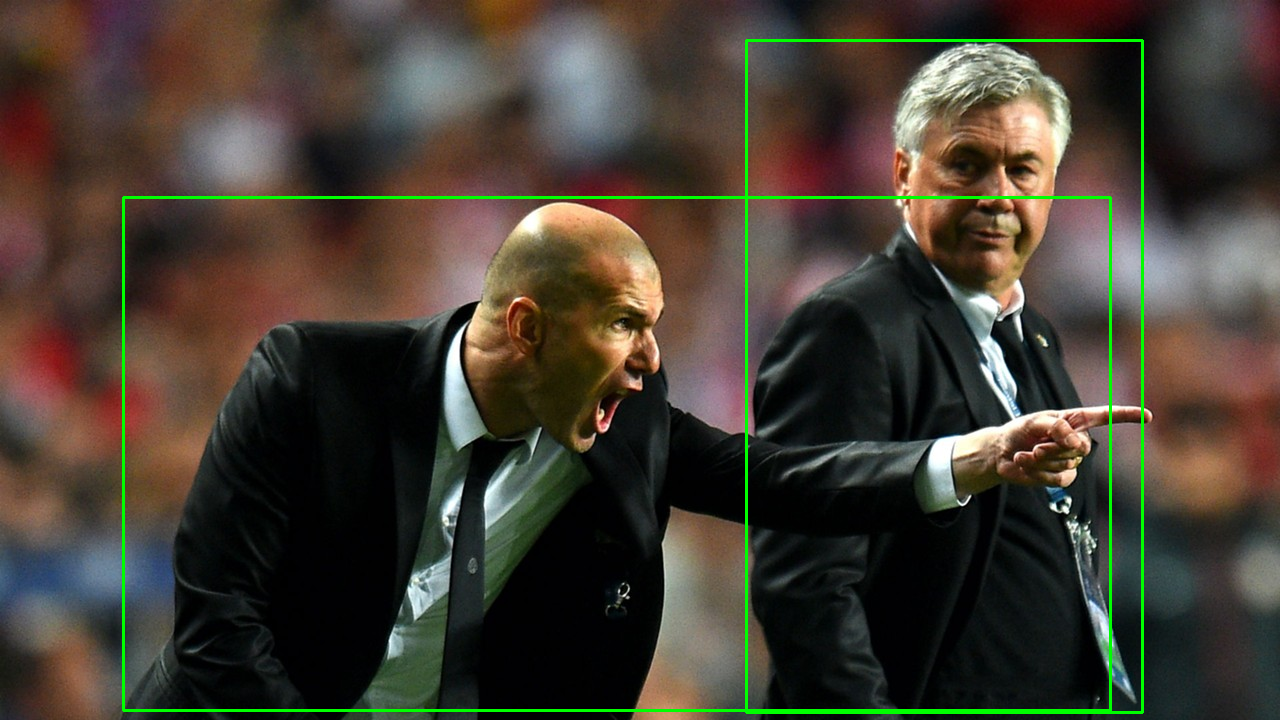

In [118]:
from google.colab.patches import cv2_imshow

image = cv2.imread('./zidane.jpg')

for box in condition:
    x1, y1, x2, y2 = box[:4]
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # 정수로 변환
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)


### 박스 좌표 저장

In [119]:
import csv
import numpy as np

coordinate = [box[:4] for idx, box in enumerate(result[0].boxes.data) if int(box[-1]) == 0 and np.round(box[-2], 2) >= 0.5]

with open('box_coordinates.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x1', 'y1', 'x2', 'y2'])  # CSV 파일의 헤더
    for box_coords in coordinate:
        writer.writerow(coordinate)

[tensor([ 123.4521,  197.1840, 1110.5618,  710.5097]),
 tensor([ 746.5687,   40.8013, 1142.0804,  712.3661])]

### YOLO V5

In [125]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16491, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16491 (delta 27), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16491/16491), 15.17 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (11290/11290), done.


In [134]:
%cd ./yolov5

/content/yolov5


In [135]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [142]:
!python detect.py --source "/content/yolov5/data/images/*.jpg" --save-txt --save-crop --augment --conf-thres=0.5 #detect.py에서 arguments 살펴보기

detect: weights=yolov5s.pt, source=/content/yolov5/data/images/*.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 3 persons, 1 bus, 711.1ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, 555.5ms
Speed: 1.7ms pre-process, 633.3ms inference, 2.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5
2 labels saved to runs/detect/exp5/labels
